# MLB Player Analysis

The UCLA Statistics Online Computational Resource (SOCR) has published [a dataset of 1,035 MLB player records](https://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) which include height, weight, player position, and age. We will analyze the data and identify any trends.

[Project Proposal.](https://docs.google.com/document/d/1hDk6ZUCiq6DlRwieadH_IvxleQqwh0uDvJXOZ8HU_wI/edit)

In [1]:
# Setup

%pip install numpy pandas matplotlib scikit-learn
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 291.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:08
   -----------

In [2]:
# This downloads the dataset as a pandas dataframe.
mlb_players = pd.read_csv(
    'https://daviddalpiaz.github.io/stat3202-sp19/project/proj-01/data/mlb_height_weight.txt',
    sep="\t")

# We will use inches and pounds, it makes intrepreting the data easier.
# To convert the data to metric, switch which code is commented out:
# mlb_players['Height'] = mlb_players['Height(inches)'] * 0.0254
# mlb_players['Weight'] = mlb_players['Weight(pounds)'] * 0.453592
# mlb_players['BMI'] = mlb_players['Weight'] / (mlb_players['Height'] ** 2)
mlb_players.rename(columns = {'Height(inches)': 'Height', 'Weight(pounds)': 'Weight'}, inplace=True)
mlb_players['BMI'] = (mlb_players['Weight'] / (mlb_players['Height'] ** 2)) * 703
# Additionally, using mlb_players.info() we find that there are no nulls we have to worry about.

mlb_players['Position'] = mlb_players['Position'].str.replace('_', ' ')
mlb_players['Name'] = mlb_players['Name'].str.replace('_', ' ')
print(mlb_players)

                 Name Team        Position  Height  Weight    Age        BMI
0       Adam Donachie  BAL         Catcher      74     180  22.99  23.108108
1           Paul Bako  BAL         Catcher      74     215  34.69  27.601351
2     Ramon Hernandez  BAL         Catcher      72     210  30.78  28.478009
3        Kevin Millar  BAL   First Baseman      72     210  35.43  28.478009
4         Chris Gomez  BAL   First Baseman      73     188  35.71  24.800901
...               ...  ...             ...     ...     ...    ...        ...
1028    Brad Thompson  STL  Relief Pitcher      73     190  25.08  25.064740
1029    Tyler Johnson  STL  Relief Pitcher      74     180  25.73  23.108108
1030   Chris Narveson  STL  Relief Pitcher      75     205  25.19  25.620444
1031    Randy Keisler  STL  Relief Pitcher      75     190  31.01  23.745778
1032      Josh Kinney  STL  Relief Pitcher      73     195  27.92  25.724339

[1033 rows x 7 columns]


In [3]:
# The first thing we do is get the mean, median, mode, min, max, and percentiles for each column.
print(mlb_players.describe())

            Height       Weight          Age          BMI
count  1033.000000  1033.000000  1033.000000  1033.000000
mean     73.698935   201.689255    28.737648    26.090936
std       2.306330    20.991491     4.322298     2.300211
min      67.000000   150.000000    20.900000    19.496533
25%      72.000000   187.000000    25.440000    24.404880
50%      74.000000   200.000000    27.930000    26.085343
75%      75.000000   215.000000    31.240000    27.601351
max      83.000000   290.000000    48.520000    35.258488


<Axes: xlabel='Team'>

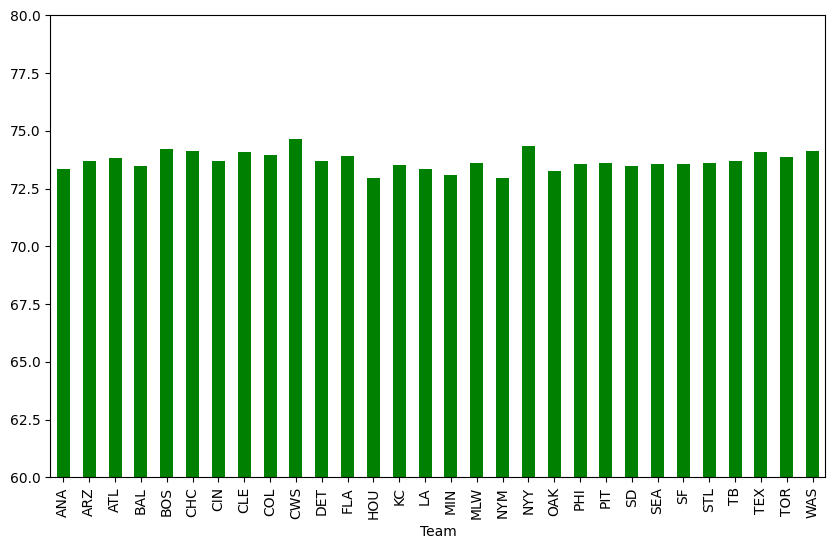

In [4]:
# We did not uncover any significant difference in average height/weight/bmi on a per-team basis.
# This example code groups a variable, Height, by team (with y lim to see the top better).
mean_by_team = mlb_players.groupby('Team')['Height'].mean()
mean_by_team.plot(kind='bar', figsize=(10, 6), color='green', ylim=(60,80))

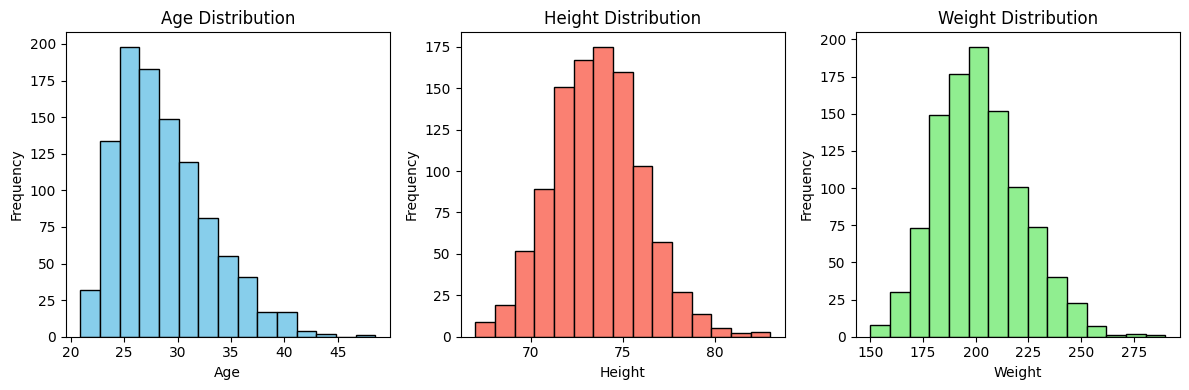

In [5]:
# Height and weight appear to be normally distributed.
# Age leans towards the younger side.

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram for Age
ax[0].hist(mlb_players['Age'], bins=15, color='skyblue', edgecolor='black')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Plot histogram for Height
ax[1].hist(mlb_players['Height'], bins=15, color='salmon', edgecolor='black')
ax[1].set_title('Height Distribution')
ax[1].set_xlabel('Height')
ax[1].set_ylabel('Frequency')

# Plot histogram for Weight
ax[2].hist(mlb_players['Weight'], bins=15, color='lightgreen', edgecolor='black')
ax[2].set_title('Weight Distribution')
ax[2].set_xlabel('Weight')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

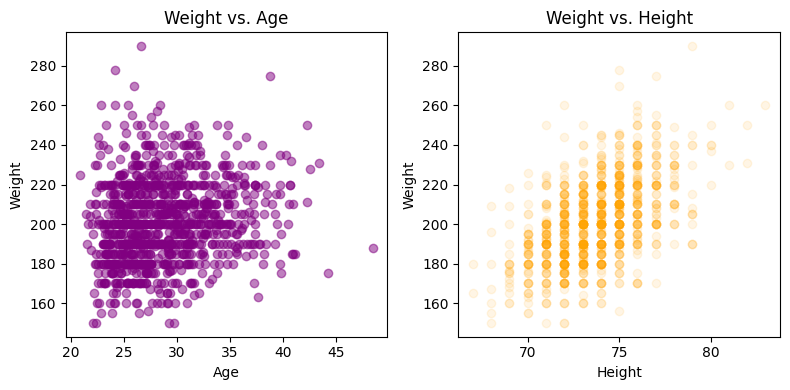

In [6]:
# There does not appear to be a correlation of weight with age, but there may be one with height.

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot of Weight vs. Age
ax[0].scatter(mlb_players['Age'], mlb_players['Weight'], color='purple', alpha=0.5)
ax[0].set_title('Weight vs. Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Weight')

# Scatter plot of Weight vs. Height
ax[1].scatter(mlb_players['Height'], mlb_players['Weight'], color='orange', alpha=0.1)
ax[1].set_title('Weight vs. Height')
ax[1].set_xlabel('Height')
ax[1].set_ylabel('Weight')

plt.tight_layout()
plt.show()

In [7]:
# Verify this with a correlation matrix

correlation_matrix = mlb_players[['Height', 'Weight', 'Age']].corr()
print(correlation_matrix)

# Only height and weight appear to be correlated, and not by much.

          Height    Weight       Age
Height  1.000000  0.531886 -0.073851
Weight  0.531886  1.000000  0.158282
Age    -0.073851  0.158282  1.000000


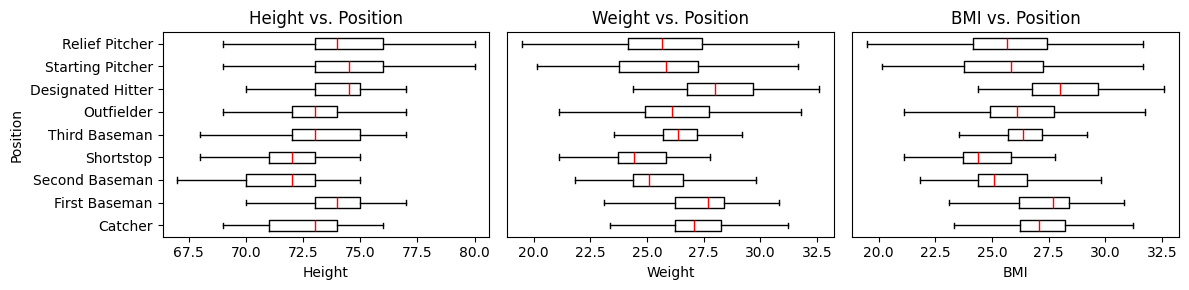

In [8]:
# We notice a few things from these graphs -
# 1. Shortstops and second basemen are shorter and weigh less than average.
# 2. Designated hitters have a relatively high BMI and also weigh the most.

height_data, bmi_data = {}, {}

for position in mlb_players['Position'].unique():
    height_data[position] = mlb_players[mlb_players['Position'] == position]['Height']
    bmi_data[position] = mlb_players[mlb_players['Position'] == position]['BMI']

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# Box and whisker plot for height
ax[0].boxplot(height_data.values(), labels=height_data.keys(), vert=False, sym='', medianprops=dict(color='red'))
ax[0].set_title('Height vs. Position')
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Position')

# Box and whisker plot for Weight
ax[1].boxplot(bmi_data.values(), vert=False, sym='', medianprops=dict(color='red'))
ax[1].set_title('Weight vs. Position')
ax[1].set_xlabel('Weight')
ax[1].set_yticks([])

# Box and whisker plot for BMI
ax[2].boxplot(bmi_data.values(), vert=False, sym='', medianprops=dict(color='red'))
ax[2].set_title('BMI vs. Position')
ax[2].set_xlabel('BMI')
ax[2].set_yticks([])

plt.tight_layout()
plt.show()

Mean Squared Error (Training): 323.12
Mean Squared Error (Testing): 287.15
R-squared (Training): 0.28
R-squared (Testing): 0.30
Coefficients of the polynomial: [0.         2.1194564  0.01811427]


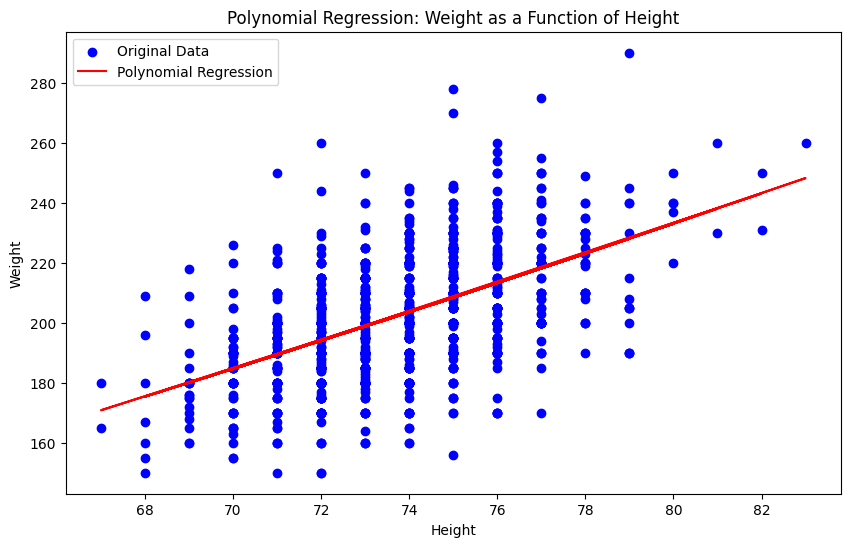

In [9]:
# We looked up how to perform a linear regressions analsysis. This is one of the methods.
# The R^2 value of ~ 0.3 indicates that 30% of weight variation is explained by height.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Extracting height and weight data
height = mlb_players['Height'].values.reshape(-1, 1)
weight = mlb_players['Weight'].values

# Split the data into training and testing sets
height_train, height_test, weight_train, weight_test = train_test_split(height, weight, test_size=0.2, random_state=42)

# Define the degree of the polynomial
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
height_train_poly = poly_features.fit_transform(height_train)
height_test_poly = poly_features.transform(height_test)

# Train a linear regression model
model = LinearRegression()
model.fit(height_train_poly, weight_train)

# Make predictions
weight_pred_train = model.predict(height_train_poly)
weight_pred_test = model.predict(height_test_poly)

# Evaluate the model
mse_train = mean_squared_error(weight_train, weight_pred_train)
mse_test = mean_squared_error(weight_test, weight_pred_test)
r2_train = r2_score(weight_train, weight_pred_train)
r2_test = r2_score(weight_test, weight_pred_test)
coefficients = model.coef_

# Print the mean squared error
print(f'Mean Squared Error (Training): {mse_train:.2f}')
print(f'Mean Squared Error (Testing): {mse_test:.2f}')
print(f'R-squared (Training): {r2_train:.2f}')
print(f'R-squared (Testing): {r2_test:.2f}')
print(f'Coefficients of the polynomial: {coefficients}')

# Plot the original data and the polynomial regression model
plt.figure(figsize=(10, 6))
plt.scatter(height, weight, label='Original Data', color='blue')
plt.plot(height, model.predict(poly_features.transform(height)), label='Polynomial Regression', color='red')
plt.title('Polynomial Regression: Weight as a Function of Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

R-squared: 0.2830
Coefficients: [ 1.84943415e-02  2.10550738e+00 -5.40353033e+01]


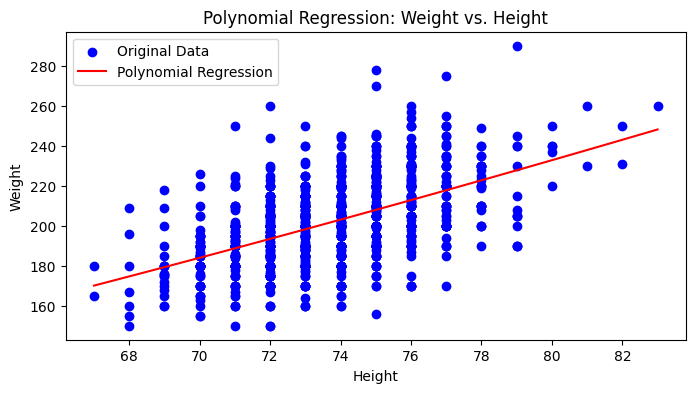

In [10]:
# This is the other option for regression, using numpy instead of a machine learning library.

height = mlb_players['Height'].values
weight = mlb_players['Weight'].values

degree = 2
coefficients = np.polyfit(height, weight, degree)
poly_function = np.poly1d(coefficients)
y_pred = poly_function(height)
r_squared = 1 - np.sum((weight - y_pred)**2) / np.sum((weight - np.mean(weight))**2)

print(f'R-squared: {r_squared:.4f}')
print(f'Coefficients: {coefficients}')

fit_x = np.linspace(min(height), max(height), 100)
fit_y = poly_function(fit_x)

# Plot
plt.figure(figsize=(8, 4))
plt.scatter(height, weight, label='Original Data', color='blue')
plt.plot(fit_x, fit_y, label='Polynomial Regression', color='red')
plt.title('Polynomial Regression: Weight vs. Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

      Height      Weight
0  62.777107   99.485511
1  73.708678  148.982286
2  72.154590  139.634136
3  61.254886  127.718128
4  77.934863  148.004003


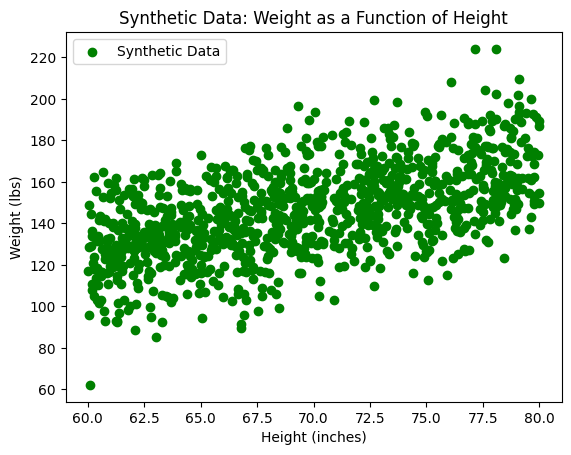

In [11]:
# Generating realistic faked data (in inches/lbs)

# Generate 1,000 random height values
faked_height = np.random.uniform(low=60, high=80, size=1000)

# Generate synthetic weight values using the polynomial function
# A scale factor of 19 results in similar variance to original data.
faked_weight = 2.1 * faked_height + np.random.normal(scale=19, size=1000)

faked_mlb_players = pd.DataFrame({'Height': faked_height, 'Weight': faked_weight})

# Print the first few rows of the synthetic data
print(faked_mlb_players.head())

# Plot the synthetic data
plt.scatter(faked_mlb_players['Height'], faked_mlb_players['Weight'], label='Synthetic Data', color='green')
plt.title('Synthetic Data: Weight as a Function of Height')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.show()

      Height      Weight
0  71.722924  143.170444
1  61.023318  145.683360
2  70.856918  148.499879
3  67.694599  133.854543
4  73.475850  145.089975


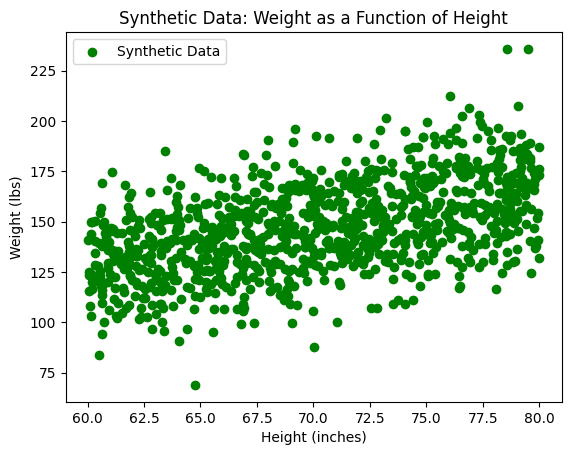

Mean Squared Error (Training): 365.95
Mean Squared Error (Testing): 390.21
R-squared (Training): 0.27
R-squared (Testing): 0.23
Coefficients of the polynomial: [0.         1.61790731 0.00279624]


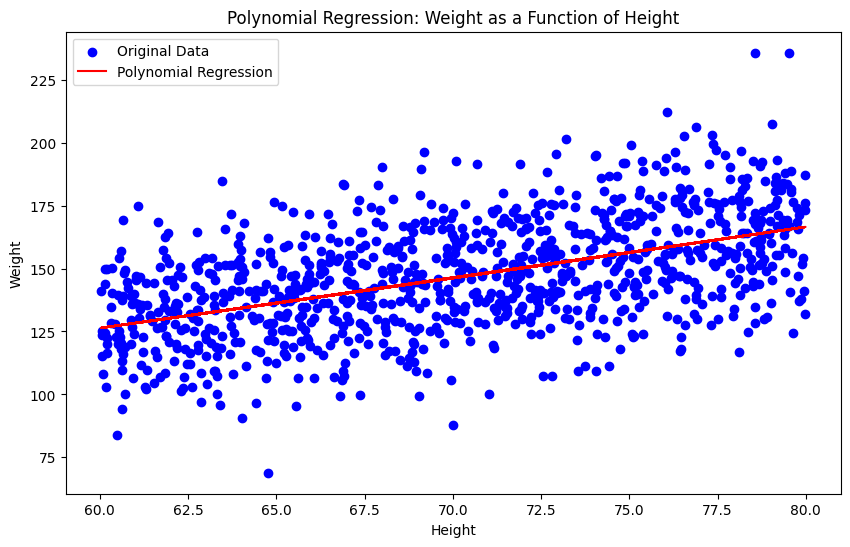

R-squared: -1260.5119
Coefficients: [1.09543899e-02 4.60871174e-01 6.05697454e+01]


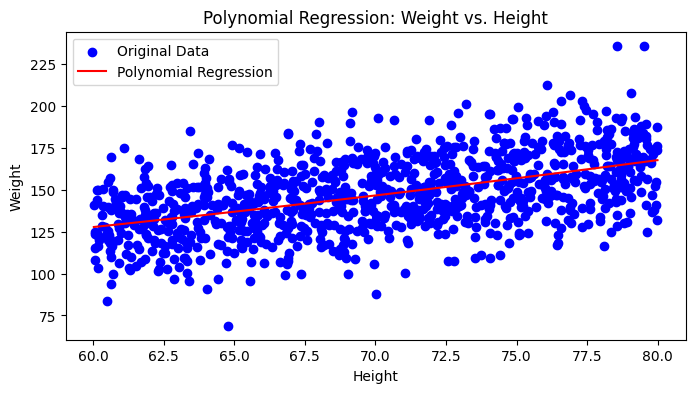

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate realistic faked data (in inches/lbs)
# Generate 1,000 random height values
faked_height = np.random.uniform(low=60, high=80, size=1000)

# Generate synthetic weight values using the polynomial function
# A scale factor of 19 results in similar variance to original data.
faked_weight = 2.1 * faked_height + np.random.normal(scale=19, size=1000)

# Create a DataFrame for the synthetic data
faked_mlb_players = pd.DataFrame({'Height': faked_height, 'Weight': faked_weight})

# Print the first few rows of the synthetic data
print(faked_mlb_players.head())

# Plot the synthetic data
plt.scatter(faked_mlb_players['Height'], faked_mlb_players['Weight'], label='Synthetic Data', color='green')
plt.title('Synthetic Data: Weight as a Function of Height')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.show()

# Perform polynomial regression using scikit-learn
height = faked_mlb_players['Height'].values.reshape(-1, 1)
weight = faked_mlb_players['Weight'].values

# Split the data into training and testing sets
height_train, height_test, weight_train, weight_test = train_test_split(height, weight, test_size=0.2, random_state=42)

# Define the degree of the polynomial
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
height_train_poly = poly_features.fit_transform(height_train)
height_test_poly = poly_features.transform(height_test)

# Train a linear regression model
model = LinearRegression()
model.fit(height_train_poly, weight_train)

# Make predictions
weight_pred_train = model.predict(height_train_poly)
weight_pred_test = model.predict(height_test_poly)

# Evaluate the model
mse_train = mean_squared_error(weight_train, weight_pred_train)
mse_test = mean_squared_error(weight_test, weight_pred_test)
r2_train = r2_score(weight_train, weight_pred_train)
r2_test = r2_score(weight_test, weight_pred_test)
coefficients = model.coef_

# Print the mean squared error and R-squared
print(f'Mean Squared Error (Training): {mse_train:.2f}')
print(f'Mean Squared Error (Testing): {mse_test:.2f}')
print(f'R-squared (Training): {r2_train:.2f}')
print(f'R-squared (Testing): {r2_test:.2f}')
print(f'Coefficients of the polynomial: {coefficients}')

# Plot the original data and the polynomial regression model
plt.figure(figsize=(10, 6))
plt.scatter(height, weight, label='Original Data', color='blue')
plt.plot(height, model.predict(poly_features.transform(height)), label='Polynomial Regression', color='red')
plt.title('Polynomial Regression: Weight as a Function of Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Perform polynomial regression using numpy
degree = 2
coefficients = np.polyfit(height.flatten(), weight, degree)
poly_function = np.poly1d(coefficients)
y_pred = poly_function(height)
r_squared = 1 - np.sum((weight - y_pred) ** 2) / np.sum((weight - np.mean(weight)) ** 2)

# Print R-squared and coefficients
print(f'R-squared: {r_squared:.4f}')
print(f'Coefficients: {coefficients}')

# Generate fitted values for the synthetic data
fit_x = np.linspace(min(height), max(height), 100)
fit_y = poly_function(fit_x)

# Plot the original data and the polynomial regression model
plt.figure(figsize=(8, 4))
plt.scatter(height, weight, label='Original Data', color='blue')
plt.plot(fit_x, fit_y, label='Polynomial Regression', color='red')
plt.title('Polynomial Regression: Weight vs. Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()